# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import config
import os

In [2]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Gene families

In [3]:
chunksize = 10000
number_of_rows = 3688215
iterator = pd.read_csv(os.path.join(config.RAW_DIR, "humann_genefamilies_overall.tsv"), sep="\t", index_col=0, chunksize=chunksize)


In [4]:
bins = np.arange(0, 1.01, 0.01)
bins

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [70]:
counts = np.zeros((100,))

In [71]:
i = 1

for data in iterator:
    print(f"{(i * chunksize) / number_of_rows}%")
    i += 1
    proportions = (data > 0).mean(axis=1)
    hist = np.histogram(proportions, bins=bins)
    count = hist[0]
    counts += count

0.027113386828045545%
0.05422677365609109%
0.08134016048413664%
0.10845354731218218%
0.13556693414022772%
0.16268032096827328%
0.18979370779631882%
0.21690709462436436%
0.2440204814524099%
0.27113386828045544%
0.298247255108501%
0.32536064193654657%
0.3524740287645921%
0.37958741559263764%
0.4067008024206832%
0.4338141892487287%
0.46092757607677426%
0.4880409629048198%
0.5151543497328653%
0.5422677365609109%
0.5693811233889564%
0.596494510217002%
0.6236078970450475%
0.6507212838730931%
0.6778346707011387%
0.7049480575291842%
0.7320614443572298%
0.7591748311852753%
0.7862882180133208%
0.8134016048413664%
0.8405149916694119%
0.8676283784974574%
0.894741765325503%
0.9218551521535485%
0.9489685389815941%
0.9760819258096396%
1.0031953126376851%


In [72]:
counts

array([2.647449e+06, 2.887820e+05, 1.465880e+05, 9.139100e+04,
       6.648900e+04, 5.174500e+04, 4.057500e+04, 3.666000e+04,
       3.226100e+04, 2.911900e+04, 2.487200e+04, 2.025000e+04,
       1.800100e+04, 1.602300e+04, 1.420700e+04, 1.253700e+04,
       1.107300e+04, 9.539000e+03, 7.976000e+03, 6.928000e+03,
       6.773000e+03, 6.861000e+03, 6.444000e+03, 5.885000e+03,
       6.012000e+03, 6.738000e+03, 4.943000e+03, 4.460000e+03,
       4.110000e+03, 3.623000e+03, 3.466000e+03, 3.115000e+03,
       2.988000e+03, 2.855000e+03, 2.745000e+03, 2.698000e+03,
       2.577000e+03, 2.684000e+03, 2.523000e+03, 2.466000e+03,
       2.795000e+03, 3.622000e+03, 2.759000e+03, 2.029000e+03,
       1.779000e+03, 1.694000e+03, 1.642000e+03, 1.552000e+03,
       1.493000e+03, 1.402000e+03, 1.310000e+03, 1.214000e+03,
       1.038000e+03, 1.026000e+03, 1.028000e+03, 8.690000e+02,
       7.490000e+02, 6.200000e+02, 4.780000e+02, 3.620000e+02,
       2.700000e+02, 2.600000e+02, 2.310000e+02, 2.6100

In [76]:
with open('../output/logs/gene_counts.npy', 'wb') as f:
    np.save(f, counts)

In [98]:
counts[50]

1310.0

In [91]:
sums = np.zeros((100))
for i in range(100):
    sums[i] = np.sum(counts[i:])
sums

array([3.688214e+06, 1.040765e+06, 7.519830e+05, 6.053950e+05,
       5.140040e+05, 4.475150e+05, 3.957700e+05, 3.551950e+05,
       3.185350e+05, 2.862740e+05, 2.571550e+05, 2.322830e+05,
       2.120330e+05, 1.940320e+05, 1.780090e+05, 1.638020e+05,
       1.512650e+05, 1.401920e+05, 1.306530e+05, 1.226770e+05,
       1.157490e+05, 1.089760e+05, 1.021150e+05, 9.567100e+04,
       8.978600e+04, 8.377400e+04, 7.703600e+04, 7.209300e+04,
       6.763300e+04, 6.352300e+04, 5.990000e+04, 5.643400e+04,
       5.331900e+04, 5.033100e+04, 4.747600e+04, 4.473100e+04,
       4.203300e+04, 3.945600e+04, 3.677200e+04, 3.424900e+04,
       3.178300e+04, 2.898800e+04, 2.536600e+04, 2.260700e+04,
       2.057800e+04, 1.879900e+04, 1.710500e+04, 1.546300e+04,
       1.391100e+04, 1.241800e+04, 1.101600e+04, 9.706000e+03,
       8.492000e+03, 7.454000e+03, 6.428000e+03, 5.400000e+03,
       4.531000e+03, 3.782000e+03, 3.162000e+03, 2.684000e+03,
       2.322000e+03, 2.052000e+03, 1.792000e+03, 1.5610

In [105]:
sums[50], sums[60]

(11016.0, 2322.0)

Text(0.5, 0, '\\% of samples with a given gene family')

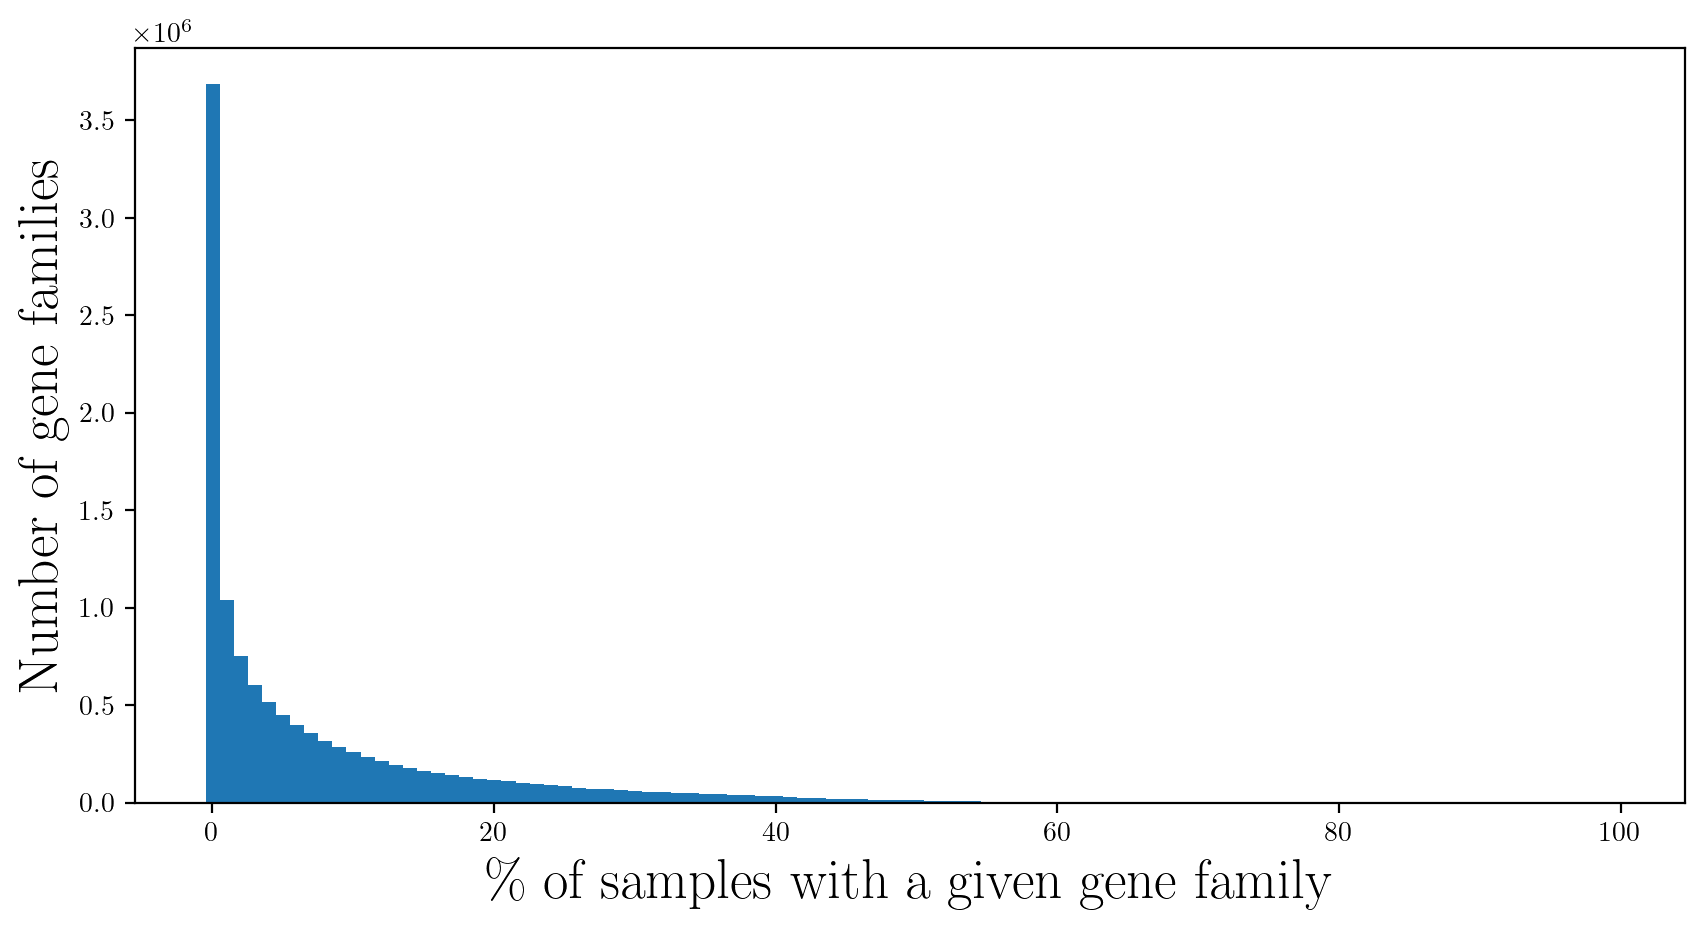

In [97]:
plt.figure(figsize=(10, 5), dpi=200)
plt.bar(bins[:-1] * 100 + 0.05, sums, width=1)
plt.ylabel("Number of gene families", fontsize=20)
plt.xlabel(f"\% of samples with a given gene family", fontsize=20)

In [82]:
bins[:-1] + 0.005

array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
       0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
       0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
       0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
       0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
       0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
       0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
       0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
       0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
       0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
       0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
       0.995])

# Keep only the 11016 genes that are present in at least 50% of samples

In [5]:
chunksize = 100000
number_of_rows = 3688215
iterator = pd.read_csv(os.path.join(config.RAW_DIR, "humann_genefamilies_overall.tsv"), sep="\t", index_col=0, chunksize=chunksize)

In [6]:
prevalence_cutoff = 0.5

In [7]:
concat_dfs = []

In [8]:
i = 1

for data in iterator:
    # log progress and increment counter
    print(f"{(i * chunksize) / number_of_rows}%")
    i += 1
    
    prevalence = (data > 0).mean(axis=1)
    keep = prevalence > prevalence_cutoff
    keep = keep[keep]
    if keep.shape[0] == 0: continue
        
    curr_df = data.loc[keep.index]
    concat_dfs.append(curr_df)

0.027113386828045545%
0.05422677365609109%
0.08134016048413664%
0.10845354731218218%
0.13556693414022772%
0.16268032096827328%
0.18979370779631882%
0.21690709462436436%
0.2440204814524099%
0.27113386828045544%
0.298247255108501%
0.32536064193654657%
0.3524740287645921%
0.37958741559263764%
0.4067008024206832%
0.4338141892487287%
0.46092757607677426%
0.4880409629048198%
0.5151543497328653%
0.5422677365609109%
0.5693811233889564%
0.596494510217002%
0.6236078970450475%
0.6507212838730931%
0.6778346707011387%
0.7049480575291842%
0.7320614443572298%
0.7591748311852753%
0.7862882180133208%
0.8134016048413664%
0.8405149916694119%
0.8676283784974574%
0.894741765325503%
0.9218551521535485%
0.9489685389815941%
0.9760819258096396%
1.0031953126376851%


In [9]:
reduced_families = pd.concat(concat_dfs).iloc[1:]
reduced_families

,Blank_S67_Abundance-RPKs,Postive-Control_S107_Abundance-RPKs,magic-0001_S22_Abundance-RPKs,magic-0004_S34_Abundance-RPKs,magic-0011_S46_Abundance-RPKs,magic-0013_S58_Abundance-RPKs,magic-0015_S70_Abundance-RPKs,magic-0016_S82_Abundance-RPKs,magic-0017_S94_Abundance-RPKs,magic-0018_S106_Abundance-RPKs,...,magic-4106_S362_Abundance-RPKs,magic-4108_S293_Abundance-RPKs,magic-4110_S305_Abundance-RPKs,magic-4111_S317_Abundance-RPKs,magic-4119_S329_Abundance-RPKs,magic-4123_S340_Abundance-RPKs,magic-4128_S352_Abundance-RPKs,magic-4130_S363_Abundance-RPKs,magic-5222_S128_Abundance-RPKs,magic-6559_S282_Abundance-RPKs
# Gene Family,,,,,,,,,,,,,,,,,,,,,
UniRef90_A0A014AUH4,0.0,0.0,0.000000,0.000000,23.076923,101.809517,0.000000,0.000000,178.728779,0.000000,...,0.000000,0.000000,0.000000,296.176049,389.216799,0.000000,0.000000,0.000000,0.000000,264.075697
UniRef90_A0A015QIN6,0.0,0.0,0.000000,34.285714,23.276341,500.364192,0.000000,0.000000,0.000000,0.000000,...,11.823226,6.729264,0.000000,1423.868229,1601.509170,54.252874,1157.594178,61.116503,0.000000,639.267183
UniRef90_A0A015S3B6,0.0,0.0,44.457278,59.178439,0.000000,0.000000,0.000000,17.773586,307.816110,0.000000,...,0.000000,0.000000,0.000000,280.026983,499.285055,0.000000,4555.555556,2253.968254,0.000000,615.865866
UniRef90_A0A015SWD5,0.0,0.0,199.783660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.014279,14.719340,40.145985,284.671533,54.744526,14.680984,2091.280982
UniRef90_A0A015T2E3,0.0,0.0,41.814699,0.000000,74.661589,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,144.571107,65.651523,24.475524,517.494786,20.979021,1019.531987,3611.986346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UniRef90_W8ZG15,0.0,0.0,350.515464,360.824742,0.000000,0.000000,474.226804,371.134021,103.092784,680.412371,...,0.000000,0.000000,0.000000,180.555556,0.000000,138.888889,0.000000,0.000000,55.952381,0.000000
UniRef90_W8ZS14,0.0,0.0,291.139241,347.944991,0.000000,0.000000,303.797468,341.772152,139.240506,443.037975,...,0.000000,0.000000,0.000000,129.629630,0.000000,203.703704,0.000000,0.000000,37.037037,0.000000
UniRef90_W9BC30,0.0,0.0,1.111969,0.263367,0.000000,0.000000,0.000000,0.000000,0.999081,0.000000,...,0.000000,0.575603,1.495034,0.000000,0.000000,0.774827,0.697076,0.000000,1.557742,0.000000


In [10]:
reduced_families.to_csv(os.path.join(config.RAW_DIR, "humann_genefamilies_overall_reduced.tsv"), sep="\t")